Name : - Kunal Mody

Batch - DS2312

## Titanic survived Project
### Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

#### Attribute Information

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [130]:
#opening dataset
tsp = pd.read_csv('titanic_train (1).csv')
tsp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [131]:
tsp.shape

(891, 12)

In [132]:
tsp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [133]:
tsp.isnull().sum() # checking null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
tsp.isnull().sum().sum() # returns a total / sum of null values in dataset

866

we can see that there are null values present in 'Age' , 'Cabin' and 'Embarked'

In [135]:
tsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
# Let's check heatmap for null valules to get more clear picture

<Axes: >

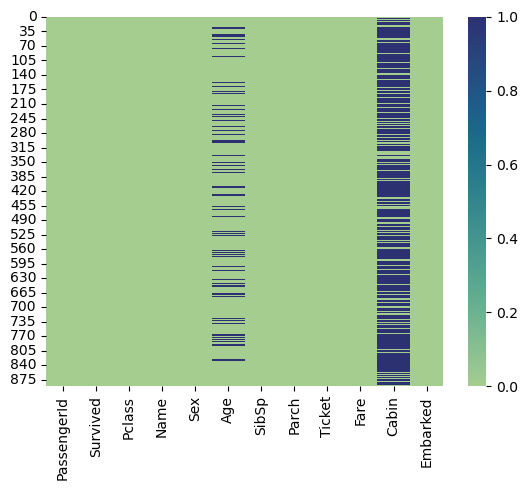

In [137]:
sns.heatmap(tsp.isnull(), cmap ='crest' )

we can clearly see that there are null values in our dataset

In [138]:
tsp.nunique().to_frame('Unique Values')

,Unique Values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [139]:
tsp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can see that our dataset has higher mean values in comper with median(50%) apart from Pclass.
In Passengerid it's equal.
As well we can see that there are 0 values in manyof the columns so need to check that as well

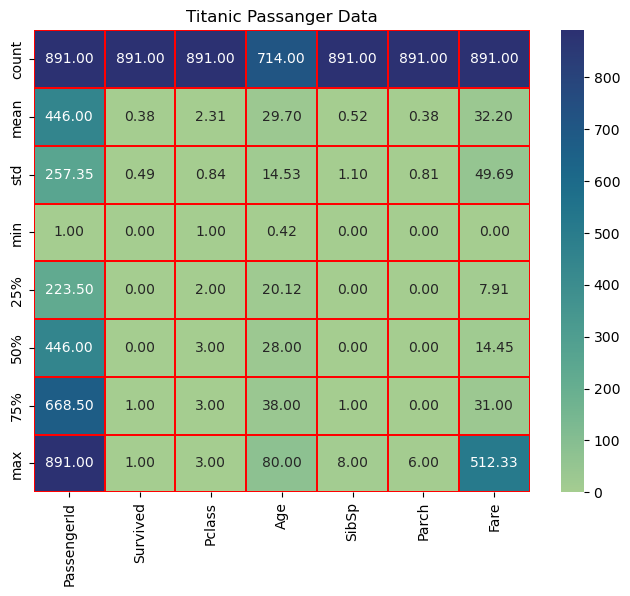

In [140]:
plt.figure(figsize=(8,6))
sns.heatmap(tsp.describe(),annot = True, fmt ='0.2f', linewidth = 0.2, linecolor = 'red', cmap= 'crest')
plt.xlable = ('Data')
plt.ylable = ('Column_Name')
plt.title('Titanic Passanger Data')
plt.show()

In [141]:
# now let's check unique values in our target column 'Survived'
tsp['Survived'].unique()

array([0, 1], dtype=int64)

In [142]:
tsp['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

So we have 2 values in Survived' column

0 - Not Survived

1 - Survived

In [143]:
#checking for blank in target column
tsp.loc[tsp['Survived']==' ']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


so there is no blanks in target column

##### As well we know that columns like 'Passengerid', 'Name','Ticket' and ' Cabin' has no impact on our prediction so we will drop those columns to make our dataset more simpler to handle.

In [144]:
tsp1 = tsp.drop(columns = ['PassengerId','Name', 'Ticket','Cabin'], axis = 1)
tsp1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [145]:
tsp1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
tsp1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

now we know that Age and Embarked column has NaN values.  
We will 1st remove NaN from Age.
we will use mean to fill NaN in Age column

In [147]:
tsp1['Age'].fillna(tsp1['Age'].mean(), inplace = True)

In [148]:
tsp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [149]:
# so now we can see that only Embarked  columns have NaN value

In [150]:
# now from above info we can see that we have 3 data types in our dataset
# 1 - int64 : 'Survived', ' Pclass', 'SibSp', 'Parch'
# 2 - float64 : 'Age', 'Fare'
# 3 - object : 'Sex', 'Embarked'
# So based on above observations we can seperate our data in 2 category, Numeric and Non-Numeric
# so all int64 and float64 columns can be classed as Numeric and all object columns as Non_Numeric or we can call them categorial

In [151]:
Numeric = ['Survived','Pclass', 'SibSp','Parch', 'Age', 'Fare']
Non_Numeric = ["Sex", "Embarked"]
Non_Numeric

['Sex', 'Embarked']

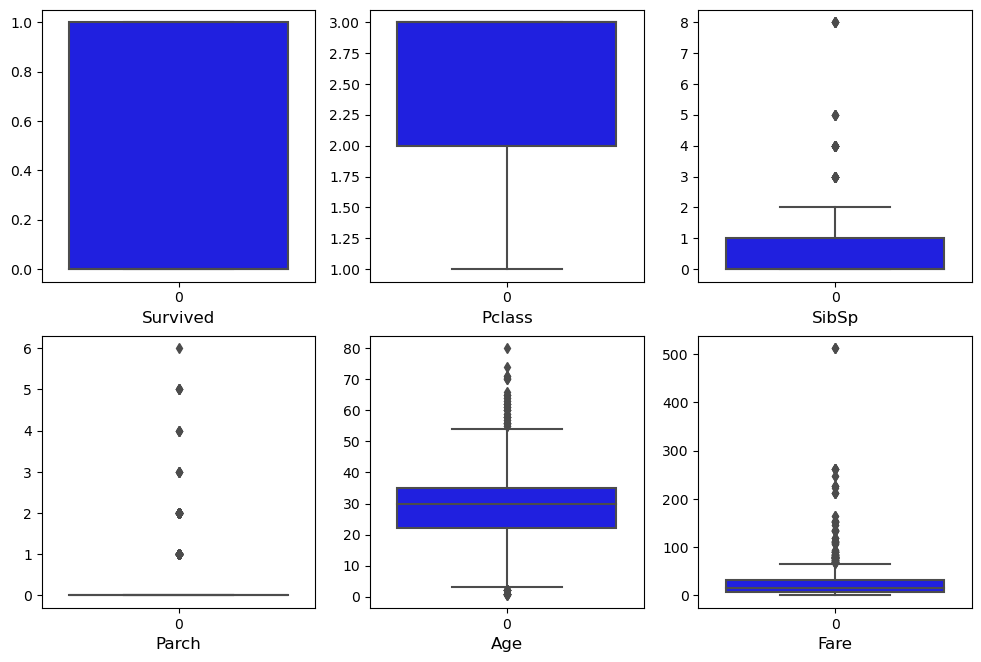

In [152]:
plt.figure(figsize =(12,12))
p = 1
for i in Numeric:
    if p<=10:
        ax= plt.subplot(3,3,p)
        sns.boxplot(tsp1[i], color= 'b')
        plt.xlabel(i, fontsize = 12)
    p+=1
plt.show()

In [153]:
# Now from above graph we can see that there are high outliers in 'Fare', 'Age' and 'SibSp' columnsb

from sklearn.preprocessing import LabelEncoder
LE= mLabelEncoder()
for i in Non_Numeric:
    tsp1[i] = LE.fit_transform(tsp1[i])
tsp1.head()

##### I am not able to convert as it comes up with error : Keyword Error - 'Sex',  i have tried to figure it out but can't find it why hence I am dropping those

In [154]:
# now we will drop non numeric from tsp1
tsp1= tsp1.drop(columns=['Sex', 'Embarked'],axis =1)
tsp1

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [155]:
# we will use zscore and IQRmethod to remove outliers and method which gives less data loss we will use that one

In [156]:
from scipy.stats import zscore

In [157]:
tsp_n = tsp1.copy()
z_score = zscore(tsp_n)
z_score_abs = np.abs(z_score)
tsp_new = tsp1[(z_score_abs<3).all(axis=1)]
tsp_new.shape


(820, 6)

In [158]:
print('original Dataset', tsp1.shape[0])
print('New dataset', tsp_new.shape[0])
print('no of rows removed', tsp1.shape[0]-tsp_new.shape[0])

original Dataset 891
New dataset 820
no of rows removed 71


In [159]:
print('Z_score data loss' ,  71/891*100,'%')

Z_score data loss 7.968574635241302 %


In [160]:
tsp2 = tsp1.copy()
q1 = tsp2.quantile(0.25)
q3 = tsp2.quantile(0.75)
iqr = q3-q1
print(iqr)

Survived     1.0000
Pclass       1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
dtype: float64


In [161]:
tsp_new1 = tsp2[~((tsp1<(q1-1.5*iqr))|(tsp1>(q3+1.5*iqr))).any(axis=1)]
tsp_new1.shape

(577, 6)

In [162]:
print ('Original Data', tsp1.shape[0])
print('New Data', tsp_new1.shape[0])
print('Diffrence', tsp1.shape[0]-tsp_new1.shape[0])

Original Data 891
New Data 577
Diffrence 314


In [163]:
print('Data loss in IQR', 314/891*100, '%')

Data loss in IQR 35.24130190796858 %


In [164]:
# so we will go with Z_Score as it has very less data loss in compare with IQR

In [165]:
tsp1 = tsp_new # transfering tsp_new data to tsp1

In [166]:
tsp1

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [167]:
tsp1.skew()

Survived    0.450825
Pclass     -0.632242
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

In [168]:
# when we apply skewness threshold of +/- 0.5 following columns have more skewness
# - Pclass
# - SibSp
# - Parch
# - Fare

In [175]:
x = tsp1.drop(columns = ['Survived'], axis = 1)
y= tsp1['Survived']

x.shape

(820, 5)

In [177]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [183]:
# Building Model

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [179]:
clf = DecisionTreeClassifier()

In [180]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [181]:
y_pred = clf.predict(x_test)

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6585365853658537

In [188]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [190]:
# Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(0,300):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y, random_state=i,test_size = 0.30)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7601626016260162 on Random_state 201


In [199]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=201, test_size=.3)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (574, 5)
Training target vector size: (574,)
Test feature matrix size: (246, 5)
Test target vector size: (246,)


In [194]:
from sklearn.linear_model import LogisticRegression

In [200]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, random_state=201, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print('Logistics Regression Evaluation','\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(y_test, y_pred),'\n')
print('Confusion matrix of Logistics Regression :','\n',confusion_matrix(y_test, y_pred),'\n')
print('Classification Report of Logistics Regression','\n',classification_report(y_test, y_pred),'\n')

Logistics Regression Evaluation 

Accuracy Score of Logistics Regression : 0.7601626016260162 

Confusion matrix of Logistics Regression : 
 [[136  25]
 [ 34  51]] 

Classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       161
           1       0.67      0.60      0.63        85

    accuracy                           0.76       246
   macro avg       0.74      0.72      0.73       246
weighted avg       0.76      0.76      0.76       246
 



## Closing
so in LR Best accuracy is 0.76 on Random_state 201

In [201]:
import pickle

In [202]:
filename = 'Titanic_Survived_Project.pkl'
pickle.dump(log_reg,open(filename,'wb'))

#### Concusion

In [203]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

76.01626016260163


In [204]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]], index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
Predicted,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
Original,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
